<a href="https://colab.research.google.com/github/tanishavaishya18/python-basics/blob/main/Day8_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PCA (PRINCIPAL COMPONENT ANALYSIS)

Principal Component Analysis reduces high dimensional data into fewer dimensions while reserving maximum variance. It finds principal components - new axes capturing most variance.

Why PCA?


*   Visualisation
*   Noise reduction


*   Feature compression
*   Speeding up ML models






In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
data = load_iris()
x = data.data
y = data.target
target_names = data.target_names #saves the species names into the variable target_names

In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [8]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

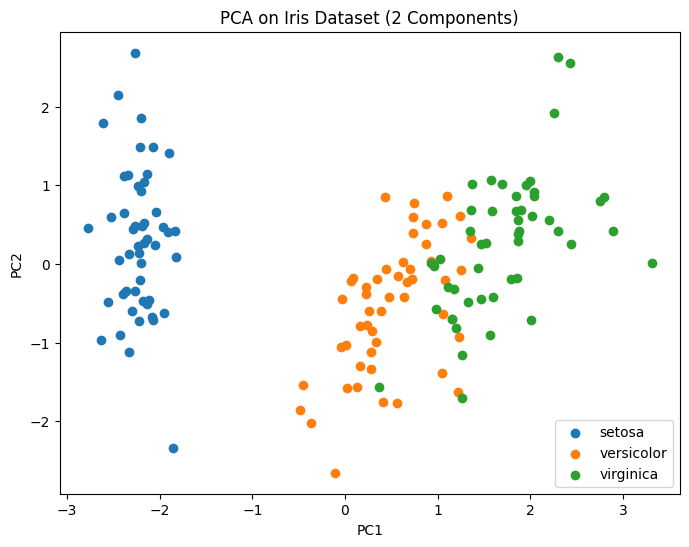

In [13]:
plt.figure(figsize=(8,6)) #sets the size of the plot(width = 8 units, height = 6 units)
for class_val in np.unique(y): #finds unique species labels(0,1,2 in iris dataset)
    #the loop runs 3 times(setosa, versicolor, virginica)
    plt.scatter(x_pca[y==class_val, 0], x_pca[y==class_val, 1], label=target_names[class_val])


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset (2 Components)")
plt.legend()
plt.show()

y == class_val - selects only the rows belonging to that class.9eg, for class_val = 0 we get all the setose rows

x_pca[y==class_val,0] takes the first pca component(PC1) for those rows.

x_pca[y==class_val,1] takes the second pca component(PC2)

label=target_names[class_val] - assigns the species names to the legends.

In [15]:
#EXPLAINED VARIANCE


In [17]:
print("Explained variance ratio : ", pca.explained_variance_ratio_)
print("Total variance preserved : ", pca.explained_variance_ratio_.sum())

Explained variance ratio :  [0.72962445 0.22850762]
Total variance preserved :  0.9581320720000166


pca.explained_variance_ratio tells us how much information(variance) each PCA preserves.

[0.72962445 0.22850762] - means PC1 preserves 72.96% and PC2 22.85%

sum() tells us the total variance preserved by boths PCs.

In [18]:
# PCA BEFORE K-MEANS

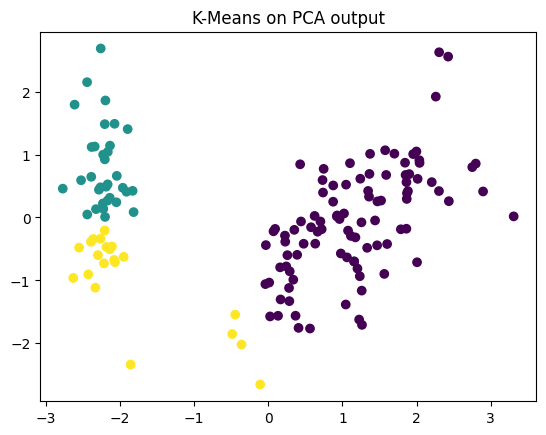

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=42)
labels=kmeans.fit_predict(x_pca)

plt.scatter(x_pca[:,0] ,x_pca[:,1], c=labels, cmap='viridis')
plt.title("K-Means on PCA output")
plt.show()

x_pca[:,0] - All rows, first column → PC1 values
similar for x_pca[:,1]
c='labels' colours the points based on their cluster label.
cmap = 'viridis' is the color map used for visualization. 'viridis' i s a popular gradient colour scheme.

In [22]:
from sklearn.metrics import silhouette_score #PCA+clustering is better than raw clustering

print("Silhouette Score : ", silhouette_score(x_pca, labels))

Silhouette Score :  0.5227910941742375
